In [2]:
import os
os.environ["TOKENIZERS_PARALLELISM"] = "false"  # Evita potenziali deadlock

# Download data

In [4]:
import requests
import pandas as pd
from io import BytesIO

def download_csv(csv_url):
    response = requests.get(csv_url)
    response.raise_for_status()

    # Qui puoi modificare 'sep' o aggiungere altri parametri se necessario
    try:
        df = pd.read_csv(BytesIO(response.content), sep=',')
    except pd.errors.ParserError:
        df = pd.read_csv(BytesIO(response.content), sep=';', error_bad_lines=False)

    return df

In [5]:
recipes_df = download_csv("https://media.githubusercontent.com/media/DonatoFe11/SustainaMeal_Case_Study/master/data/final_recipes_set.csv")

In [6]:
recipes_df

,title,sustainability_score,sustainability_label,Unnamed: 0,recipe_id,description,author_id,duration,directions,ingredients,...,protein [g],direction_size,ingredients_sizes,who_score,fsa_score,nutri_score,normalization_comment,ingredient_food_kg_urls,ingredient_food_kg_names,healthiness_label
0,Boiled Radishes,0.002502,0,294268,179840,These taste a lot like new potatoes. The boil...,254469,22.0,"['Trim ends and bad spots off Radishes.', 'Boi...","['radishes size bag bunch', 'water radishes']",...,0.8,2,2,0.293040,1.000,0.75,NaN,['http://idea.rpi.edu/heals/kb/ingredientname/...,"['applesauce', 'garlic clove', 'ginger', 'mola...",0
1,Apple Cider Reduction,0.002623,0,59722,521756,I saw a post about this on Facebook and gave i...,171084,155.0,"['In 6-8 quart stock pan, measure out 2 cups o...","['gallon apple cider fresh', 'gallon apple cid...",...,0.0,10,2,0.214286,0.750,0.75,NaN,['http://idea.rpi.edu/heals/kb/ingredientname/...,"['bean sprouts', 'chicken thighs', 'fresh ging...",1
2,Homemade Apple Pectin Stock,0.002623,0,159910,25188,Easy to make and works well.,10404,25.0,['Slice unpeeled apples including cores and se...,"['tart apple', 'water pound apples']",...,1.2,11,2,0.278414,0.750,0.75,NaN,['http://idea.rpi.edu/heals/kb/ingredientname/...,"['baking powder', 'baking soda', 'cinnamon', '...",0
3,Easy Applesauce,0.002623,0,421226,264179,Use fresh cooking apples for this for best res...,37636,50.0,['Place apples and cider into a large saucepan...,"['apples', 'apple cider']",...,0.5,3,2,0.276525,0.875,0.75,NaN,['http://idea.rpi.edu/heals/kb/ingredientname/...,"['carrots', 'fresh peas', 'fresh tomatoes', 'g...",0
4,Cider Baked Sausage,0.002752,0,374088,101966,A very easy to make main dish perfect for fall...,30534,50.0,"['Preheat oven to 350°.', 'Prick sausages with...","['breakfast sausage links', 'apples Smith', 'o...",...,46.4,4,4,0.146714,0.125,0.00,NaN,['http://idea.rpi.edu/heals/kb/ingredientname/...,"['Shedd Spread Country Crock', 'cayenne pepper...",2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93743,Curried Lamb on Rice,0.951024,2,103145,373244,"With modification this recipe is from ""The Dia...",133174,65.0,"['Over medium heat, melt the butter in a large...","['lamb', 'medium onion', 'cloves', 'butter', '...",...,28.7,5,13,0.223549,0.625,0.25,NaN,['http://idea.rpi.edu/heals/kb/ingredientname/...,"['Dijon mustard', 'Polish sausage', 'apricot p...",1
93744,Rich Lamb Curry,0.960504,2,442694,268247,The recipe isn't as time consuming as it looks...,491437,110.0,"['Heat 1 tbsp olive oil in dutch oven. ', 'Co...","['oil', 'lamb', 'flour', 'salt pepper', 'onion...",...,36.1,9,21,0.153328,0.000,0.00,NaN,NaN,NaN,1
93745,"Middle Eastern Slow-Cooked Stew With Lamb, Chi...",0.968458,2,359960,144850,From Cooking Light. Per 3/4 c. serving: 310 ca...,37779,112.0,['Let the oil get heating in a large pot over ...,"['oil', 'lamb', 'onions rings', 'water', 'clov...",...,20.8,12,19,0.205566,0.250,0.25,NaN,['http://idea.rpi.edu/heals/kb/ingredientname/...,"['anchovies', 'celery ribs', 'diced tomatoes',...",1
93746,Five Meat Chili Con Carne With Beans,0.971454,2,37637,13568,yum,20571,210.0,"['In a large pot brown meat in stages, about a...","['beef', 'pork', 'lamb', 'sausage', 'sausage',...",...,14.5,7,15,0.197568,0.250,0.25,NaN,['http://idea.rpi.edu/heals/kb/ingredientname/...,"[""French\\'s French fried onions"", 'crabmeat',...",1


# SustainaMeal (ETA: 15/20 mins)

Initializes the system by loading the data and preparing the embeddings.

In [7]:
from HeASe.sustainameal import SustainaMeal

nutrients = ['calories [cal]', 'totalFat [g]', 'saturatedFat [g]', 'cholesterol [mg]', 'sodium [mg]', 'dietaryFiber [g]', 'sugars [g]', 'protein [g]']

sm = SustainaMeal(
    recipes_df=recipes_df,
    nutrients=['calories [cal]', 'totalFat [g]', 'saturatedFat [g]', 'cholesterol [mg]', 'sodium [mg]', 'dietaryFiber [g]', 'sugars [g]', 'protein [g]'],
    transformer_name='davanstrien/autotrain-recipes-2451975973'
)

/home/festa/SustainaMeal_Case_Study/venv/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Processing Titles embeddings: 100%|██████████| 93748/93748 [19:09<00:00, 81.53batch/s]


# Upload Recipes of experiments

In [8]:
import pandas as pd

# Paths to the JSON files

sustainability_label_2_recipes_file = '../experiments/data/sustainability_label_2_recipes.json'

# Read the JSON files into pandas DataFrames

sustainability_label_2_recipes = pd.read_json(sustainability_label_2_recipes_file)

# Compare LLM Rerank

In [9]:
sm.setup_llama_model_id()
sm.create_agent()

Loading checkpoint shards: 100%|██████████| 4/4 [06:33<00:00, 98.47s/it] 


In [10]:
acceptable_tags = ['appetizers', 'main-dish', 'side-dishes', 'drinks', 'beverages', 'fruits', 'desserts',
                   'breakfast', 'pasta-rice-and-grains', 'rice', 'pasta', 'pizza', 'breads', 'meat', 'fish',
                   'seafood', 'beef', 'chicken', 'vegetarian']

In [11]:
nutrients_string = ", ".join(nutrients)
print(nutrients_string)

calories [cal], totalFat [g], saturatedFat [g], cholesterol [mg], sodium [mg], dietaryFiber [g], sugars [g], protein [g]


In [12]:
selected_recipes = pd.concat([sustainability_label_2_recipes])

In [13]:
len(selected_recipes)

100

In [14]:
# Definisci le soglie
WHO_SCORE_THRESHOLDS = ( 0.15, 0.25)  # (soglia media, soglia alta)
SUSTAINABILITY_SCORE_THRESHOLDS = (0.1, 0.5)  # (soglia media, soglia alta)

# Funzioni di aiuto per calcolare le label
def calculate_healthiness_label(who_score):
    if who_score > WHO_SCORE_THRESHOLDS[1]:
        return "0"
    elif who_score < WHO_SCORE_THRESHOLDS[0]:
        return "2"
    else:
        return "1"

def calculate_sustainability_label(sustainability_score):
    if sustainability_score <= SUSTAINABILITY_SCORE_THRESHOLDS[1]:
        return "0"
    elif sustainability_score >= SUSTAINABILITY_SCORE_THRESHOLDS[1]:
        return "2"
    else:
        return "1"

# Calcola le label in base ai valori di who_score e sustainability_score

In [16]:
similar_recipes = sm.find_similar_recipes("Pasta", 10, acceptable_tags=acceptable_tags, match_all_tags=False)

Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 63.15batch/s]


Tags to match: ['main-dish', 'pasta', 'vegetarian', 'pasta-rice-and-grains']
Number of filtered recipes: 40632


In [17]:
ordered_recipes = sm.order_recipe_by_sustainameal()
print(ordered_recipes)

                                                   title  similarity_score  \
14718                             Brown Rice and Edamame          0.983478   
15242  Tofu With Red Curry Paste, Peas, and Yellow To...          0.987000   
10896                Pasta with Tomatoes, Peas and Cream          0.989872   
27313                                          Tofu Bowl          0.982967   
47161                       Asparagus-Mushroom Primavera          0.989029   
59687         Angel Hair With Tomatoes, Basil and Garlic          0.983265   
65588                  Spaghettini With Smothered Onions          0.983291   
60293                    Orlando Bloom's Pasta Au Pistou          0.985503   
68061               Mini Farfalle With Tomatoes and Corn          0.991634   
79355                Pasta and Potatoes (Pasta e Patate)          0.984892   

       who_score  healthiness_increment  sustainability_score  \
14718   0.345328              47.711098              0.909384   
15242   0.3

In [18]:
ordered_recipes_llama = sm.order_recipe_by_sustainameal()
print(ordered_recipes_llama)

                                                   title  similarity_score  \
14718                             Brown Rice and Edamame          0.983478   
15242  Tofu With Red Curry Paste, Peas, and Yellow To...          0.987000   
10896                Pasta with Tomatoes, Peas and Cream          0.989872   
27313                                          Tofu Bowl          0.982967   
47161                       Asparagus-Mushroom Primavera          0.989029   
59687         Angel Hair With Tomatoes, Basil and Garlic          0.983265   
65588                  Spaghettini With Smothered Onions          0.983291   
60293                    Orlando Bloom's Pasta Au Pistou          0.985503   
68061               Mini Farfalle With Tomatoes and Corn          0.991634   
79355                Pasta and Potatoes (Pasta e Patate)          0.984892   

       who_score  healthiness_increment  sustainability_score  \
14718   0.345328              47.711098              0.909384   
15242   0.3

In [19]:
best_choice_by_llama = sm.choose_best_recipe_with_llama()

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
The attention mask is not set and cannot be inferred from input because pad token is same as eos token.As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.


In [20]:
explanation_choice_by_llama = sm.choose_and_explain_best_recipe_with_llama()

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


In [21]:
import json
import pandas as pd

# Assumi che 'SustainaMeal', 'acceptable_tags', 'nutrients_string', e 'recipe_titles' siano definiti

# Parametri per gli esperimenti
k_values = [10]
match_all_tags_values = [False]

# Funzione ausiliaria per convertire oggetti in formati serializzabili in JSON
def convert_to_serializable(obj):
    if hasattr(obj, 'to_dict'):
        return obj.to_dict('records')
    elif hasattr(obj, 'tolist'):
        return obj.tolist()
    elif isinstance(obj, (list, dict, str, int, float, bool, type(None))):
        return obj
    else:
        return str(obj)

results = []  # Lista per raccogliere i risultati degli esperimenti

for index, row in selected_recipes.iterrows():
    input_recipe = row['title']
    match_results = {}  # Dizionario per memorizzare i risultati di match per ogni k
    for k in k_values:
        match_results[k] = {'exact_match': False, 'match_count': 0}  # Inizializza il conteggio e il match esatto per ogni k
        for match_all_tags in match_all_tags_values:
            try:
                similar_recipes = sm.find_similar_recipes(input_recipe, k, acceptable_tags=acceptable_tags, match_all_tags=match_all_tags)
                ordered_recipes = sm.order_recipe_by_sustainameal()
                ordered_recipes_llama = sm.order_recipe_by_sustainameal()

                best_choice_by_llama = sm.choose_best_recipe_with_llama()
                explanation_by_llama = sm.choose_and_explain_best_recipe_with_llama()
                llama_choice_match = ordered_recipes.iloc[0]['title'] == best_choice_by_llama
                if llama_choice_match:
                    match_results[k]['match_count'] += 1
                    if match_all_tags:  # Se consideri importante il match quando match_all_tags è True
                        match_results[k]['exact_match'] = True
                result = {
                    'recipe_name': input_recipe,
                    'recipe_id': row['recipe_id'],
                    'sustnability_score': row['sustainability_score'],
                    'sustnability_label': row['sustainability_label'],
                    'who_score': row['who_score'],
                    'healthiness_label': row['healthiness_label'],
                    'k': k,
                    'nutrients': nutrients_string,
                    'match_all_tags': match_all_tags,
                    'llama_choice': best_choice_by_llama,
                    'llama_explanation':explanation_by_llama,
                    'similar_recipes': convert_to_serializable(similar_recipes) if similar_recipes is not None else None,
                    'ordered_by_sustainameal': convert_to_serializable(ordered_recipes) if ordered_recipes is not None else None
                }
                results.append(result)
            except Exception as e:
                print(f"An error occurred while finding similar recipes: {e}")
                best_choice_by_llama = None

# Salva i risultati in un file JSON
with open('experiment_results_with_llama_and_similarity_k_10.json', 'w') as f:
    json.dump(results, f, ensure_ascii=False, indent=4)

Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 43.18batch/s]

Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 28937


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 66.81batch/s]


Tags to match: ['main-dish', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 34344


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 68.47batch/s]


Tags to match: ['main-dish', 'beef', 'pasta', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 34345


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 63.11batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 28937


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 79.24batch/s]


Tags to match: ['main-dish', 'beef', 'pasta', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 34345


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 74.44batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 28937


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 79.48batch/s]


Tags to match: ['main-dish', 'pasta', 'pasta-rice-and-grains']
Number of filtered recipes: 30436


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 67.01batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 28937


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 78.82batch/s]


Tags to match: ['main-dish', 'beef', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 34344


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 57.23batch/s]


Tags to match: ['main-dish', 'beef', 'pasta', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 34345


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 69.88batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 28937


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 66.47batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 28937


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 78.60batch/s]


Tags to match: ['breakfast', 'main-dish', 'beef', 'meat']
Number of filtered recipes: 34846


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 78.52batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 28937


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 63.13batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 28937


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 51.02batch/s]


Tags to match: ['main-dish', 'meat']
Number of filtered recipes: 28937


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 66.40batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 28937


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 65.07batch/s]


Tags to match: ['appetizers', 'main-dish', 'seafood']
Number of filtered recipes: 32250


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 77.79batch/s]


Tags to match: ['appetizers', 'main-dish', 'beef', 'meat']
Number of filtered recipes: 34526


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 68.43batch/s]


Tags to match: ['beef', 'meat']
Number of filtered recipes: 17375


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 67.30batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 28937


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 66.54batch/s]


Tags to match: ['appetizers', 'beef', 'meat']
Number of filtered recipes: 23411


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 64.57batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 28937


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 61.98batch/s]


Tags to match: ['beef', 'meat']
Number of filtered recipes: 17375


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 69.97batch/s]


Tags to match: ['main-dish']
Number of filtered recipes: 24622


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 66.66batch/s]


Tags to match: ['main-dish', 'beef', 'pasta', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 34345


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 64.17batch/s]


Tags to match: ['main-dish', 'beef', 'pasta', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 34345


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 66.22batch/s]


Tags to match: ['main-dish']
Number of filtered recipes: 24622


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 67.14batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 28937


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 60.36batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 28937


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 66.71batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 28937


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 65.92batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 28937


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 65.76batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 28937


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 79.56batch/s]


Tags to match: ['main-dish', 'side-dishes', 'rice', 'pasta-rice-and-grains']
Number of filtered recipes: 39608


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 67.62batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 28937


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 66.18batch/s]


Tags to match: ['main-dish', 'beef', 'pasta', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 34345


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 66.63batch/s]


Tags to match: ['main-dish', 'meat']
Number of filtered recipes: 28937


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 69.81batch/s]


Tags to match: ['appetizers', 'beef', 'meat']
Number of filtered recipes: 23411


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 67.38batch/s]


Tags to match: ['main-dish']
Number of filtered recipes: 24622


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 67.86batch/s]


Tags to match: ['main-dish', 'seafood']
Number of filtered recipes: 26549


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 64.58batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 28937


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 70.34batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 28937


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 67.54batch/s]


Tags to match: ['main-dish']
Number of filtered recipes: 24622


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 64.01batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 28937


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 67.59batch/s]
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Tags to match: ['pasta', 'pasta-rice-and-grains']
Number of filtered recipes: 12334


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 67.24batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 28937


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 76.78batch/s]


Tags to match: ['main-dish', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 34344


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 78.36batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 28937


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 74.52batch/s]


Tags to match: ['main-dish', 'beef', 'pasta', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 34345


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 65.56batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 28937


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 66.75batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 28937


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 63.01batch/s]
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.


Tags to match: ['beef', 'meat']
Number of filtered recipes: 17375


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 64.06batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 28937


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 66.40batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 28937


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 72.21batch/s]


Tags to match: ['beef', 'meat']
Number of filtered recipes: 17375


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 68.87batch/s]


Tags to match: ['main-dish', 'pasta', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 34345


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 62.07batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 28937


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 77.25batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 28937


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 58.87batch/s]


Tags to match: ['main-dish', 'meat']
Number of filtered recipes: 28937


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 65.62batch/s]


Tags to match: ['main-dish', 'meat']
Number of filtered recipes: 28937


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 66.85batch/s]


Tags to match: ['main-dish']
Number of filtered recipes: 24622


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 65.83batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 28937


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 70.13batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 28937


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 64.40batch/s]


Tags to match: ['beef', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 26857


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 66.14batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 28937


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 68.69batch/s]


Tags to match: ['main-dish', 'beef', 'pizza', 'meat']
Number of filtered recipes: 28937


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 80.24batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 28937


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 71.09batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 28937


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 66.50batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 28937


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 60.78batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 28937


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 63.70batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 28937


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 67.16batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 28937


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 65.86batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 28937


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 67.99batch/s]


Tags to match: ['main-dish', 'beef', 'pasta', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 34345


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 65.82batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 28937


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 63.07batch/s]
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Tags to match: ['main-dish']
Number of filtered recipes: 24622


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 63.06batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 28937


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 69.19batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 28937


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 66.50batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 28937


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 64.55batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 28937


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 66.32batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 28937


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 65.02batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 28937


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 66.34batch/s]
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Tags to match: ['appetizers', 'seafood']
Number of filtered recipes: 11479


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 66.51batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 28937


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 66.64batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 28937


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 71.70batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 28937


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 66.50batch/s]
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.


Tags to match: ['main-dish']
Number of filtered recipes: 24622


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 62.59batch/s]


Tags to match: ['main-dish', 'pasta', 'pasta-rice-and-grains']
Number of filtered recipes: 30436


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 66.94batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 28937


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 62.08batch/s]


Tags to match: ['main-dish', 'beef', 'rice', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 34344


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 64.72batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 28937


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 60.06batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 28937


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 64.71batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 28937


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 64.44batch/s]


Tags to match: ['appetizers', 'main-dish', 'beef', 'meat']
Number of filtered recipes: 34526


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 75.77batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 28937


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 63.21batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 28937


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 64.58batch/s]


Tags to match: ['main-dish', 'meat']
Number of filtered recipes: 28937


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 62.77batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 28937


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 65.37batch/s]


Tags to match: ['main-dish', 'pasta', 'pasta-rice-and-grains']
Number of filtered recipes: 30436


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 70.81batch/s]


Tags to match: ['main-dish', 'beef', 'rice', 'meat', 'pasta-rice-and-grains']


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Number of filtered recipes: 34344


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


In [22]:
len(results)

100

In [23]:
import json
import pandas as pd

# Carica i dati dal file JSON
with open('experiment_results_with_llama_and_similarity_k_10.json', 'r') as file:
    experiment_data = json.load(file)

# Converti i dati in un DataFrame
experiment_df = pd.DataFrame(experiment_data)

# Assumiamo di avere gli ID delle ricette per ogni sottogruppo
sustainability_label_2_ids = sustainability_label_2_recipes['recipe_id'].unique()

In [24]:
import json
import pandas as pd

# Carica i dati dal file JSON
with open('experiment_results_with_llama_and_similarity_k_10.json', 'r') as file:
    experiment_data = json.load(file)

# Converti i dati in un DataFrame
experiment_df = pd.DataFrame(experiment_data)

# Estrai solo le entrate dove llama ha fatto una scelta
llama_choices_df = experiment_df.dropna(subset=['llama_choice'])

# Inizializza i contatori per gli incrementi
healthiness_increments = []
sustainability_increments = []
sustainameal_score_increments = []

# Calcola gli incrementi solo per le scelte di llama
for index, row in llama_choices_df.iterrows():
    for ordered_recipe in row['ordered_by_sustainameal']:
        if ordered_recipe['title'] == row['llama_choice']:
            healthiness_increments.append(ordered_recipe['healthiness_increment'])
            sustainability_increments.append(ordered_recipe['sustainability_increment'])
            sustainameal_score_increments.append(ordered_recipe['sustainameal_score_increment'])
            break  # Interrompi il ciclo dopo aver trovato la corrispondenza

# Calcola le medie degli incrementi per le scelte di llama
average_healthiness_increment = sum(healthiness_increments) / len(healthiness_increments) if healthiness_increments else None
average_sustainability_increment = sum(sustainability_increments) / len(sustainability_increments) if sustainability_increments else None
average_sustainameal_score_increment = sum(sustainameal_score_increments) / len(sustainameal_score_increments) if sustainameal_score_increments else None

# Crea un DataFrame con una riga contenente le medie e la colonna llama_rerank impostata a True
llama_results_df = pd.DataFrame({
    'top_healthiness_increment_mean': [average_healthiness_increment],
    'top_sustainability_increment_mean': [average_sustainability_increment],
    'top_sustainameal_score_increment_mean': [average_sustainameal_score_increment],
    'llama_rerank': [True],
    'k':10,
})

# Stampa il DataFrame dei risultati
print(llama_results_df)


   top_healthiness_increment_mean  top_sustainability_increment_mean  \
0                         8.48651                          71.523209   

   top_sustainameal_score_increment_mean  llama_rerank   k  
0                              56.373876          True  10  


In [25]:
import json
import pandas as pd

# Carica i dati dal file JSON
with open('experiment_results_with_llama_and_similarity_k_10.json', 'r') as file:
    experiment_data = json.load(file)

# Converti i dati in un DataFrame
experiment_df = pd.DataFrame(experiment_data)

# Inizializza i contatori per gli incrementi
top_healthiness_increments = []
top_sustainability_increments = []
top_sustainameal_score_increments = []

# Calcola gli incrementi per le prime ricette in ordered_by_sustainameal
for index, row in experiment_df.iterrows():
    if row['ordered_by_sustainameal']:  # Controlla se la lista non è vuota
        top_recipe = row['ordered_by_sustainameal'][0]  # Prende sempre la prima ricetta
        top_healthiness_increments.append(top_recipe['healthiness_increment'])
        top_sustainability_increments.append(top_recipe['sustainability_increment'])
        top_sustainameal_score_increments.append(top_recipe['sustainameal_score_increment'])

# Calcola le medie degli incrementi per le prime ricette
average_top_healthiness_increment = sum(top_healthiness_increments) / len(top_healthiness_increments) if top_healthiness_increments else None
average_top_sustainability_increment = sum(top_sustainability_increments) / len(top_sustainability_increments) if top_sustainability_increments else None
average_top_sustainameal_score_increment = sum(top_sustainameal_score_increments) / len(top_sustainameal_score_increments) if top_sustainameal_score_increments else None

# Crea un DataFrame con una riga contenente le medie
top_results_df_10 = pd.DataFrame({
    'top_healthiness_increment_mean': [average_top_healthiness_increment],
    'top_sustainability_increment_mean': [average_top_sustainability_increment],
    'top_sustainameal_score_increment_mean': [average_top_sustainameal_score_increment],
    'llama_rerank': [False],
    'k':10,
})

# Stampa il DataFrame dei risultati
print(top_results_df_10)

   top_healthiness_increment_mean  top_sustainability_increment_mean  \
0                       16.424224                            139.866   

   top_sustainameal_score_increment_mean  llama_rerank   k  
0                             111.424199         False  10  


In [26]:
import json
import pandas as pd

# Carica i dati dal file JSON
with open('experiment_results_with_llama_and_similarity_k_10.json', 'r') as file:
    experiment_data = json.load(file)

# Converti i dati in un DataFrame
experiment_df = pd.DataFrame(experiment_data)

# Filtra per gli esperimenti in cui llama ha fatto una scelta
llama_choices_df = experiment_df.dropna(subset=['llama_choice'])

# Calcola le corrispondenze esatte
exact_matches = llama_choices_df.apply(lambda row: row['ordered_by_sustainameal'][0]['title'] == row['llama_choice'], axis=1)

# Calcola la percentuale di corrispondenze esatte
exact_match_count = exact_matches.sum()
total_choices = len(llama_choices_df)
exact_match_percentage = (exact_match_count / total_choices * 100) if total_choices > 0 else 0

# Stampa il conteggio delle corrispondenze esatte e la percentuale
print(f"Corrispondenze esatte: {exact_match_count}")
print(f"Percentuale di corrispondenza esatta con llama: {exact_match_percentage}%")

Corrispondenze esatte: 4
Percentuale di corrispondenza esatta con llama: 4.0%


In [27]:
import json
import pandas as pd

# Assumi che 'SustainaMeal', 'acceptable_tags', 'nutrients_string', e 'recipe_titles' siano definiti

# Parametri per gli esperimenti
k_values = [1]
match_all_tags_values = [False]

# Funzione ausiliaria per convertire oggetti in formati serializzabili in JSON
def convert_to_serializable(obj):
    if hasattr(obj, 'to_dict'):
        return obj.to_dict('records')
    elif hasattr(obj, 'tolist'):
        return obj.tolist()
    elif isinstance(obj, (list, dict, str, int, float, bool, type(None))):
        return obj
    else:
        return str(obj)

results = []  # Lista per raccogliere i risultati degli esperimenti

for index, row in selected_recipes.iterrows():
    input_recipe = row['title']
    match_results = {}  # Dizionario per memorizzare i risultati di match per ogni k
    for k in k_values:
        match_results[k] = {'exact_match': False, 'match_count': 0}  # Inizializza il conteggio e il match esatto per ogni k
        for match_all_tags in match_all_tags_values:
            try:
                similar_recipes = sm.find_similar_recipes(input_recipe, k, acceptable_tags=acceptable_tags, match_all_tags=match_all_tags)
                ordered_recipes = sm.order_recipe_by_sustainameal()
                ordered_recipes_llama = sm.order_recipe_by_sustainameal()
                result = {
                    'recipe_name': input_recipe,
                    'recipe_id': row['recipe_id'],
                    'sustnability_score': row['sustainability_score'],
                    'sustnability_label': row['sustainability_label'],
                    'who_score': row['who_score'],
                    'healthiness_label': row['healthiness_label'],
                    'k': k,
                    'nutrients': nutrients_string,
                    'match_all_tags': match_all_tags,
                    'similar_recipes': convert_to_serializable(similar_recipes) if similar_recipes is not None else None,
                    'ordered_by_sustainameal': convert_to_serializable(ordered_recipes) if ordered_recipes is not None else None
                }
                results.append(result)
            except Exception as e:
                print(f"An error occurred while finding similar recipes: {e}")
                best_choice_by_llama = None



with open('experiment_results_with_llama_and_similarity_k_1.json', 'w') as f:
    json.dump(results, f, ensure_ascii=False, indent=4)

Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 42.76batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 28937


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 52.06batch/s]


Tags to match: ['main-dish', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 34344


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 74.79batch/s]


Tags to match: ['main-dish', 'beef', 'pasta', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 34345


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 48.07batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 28937


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 63.60batch/s]


Tags to match: ['main-dish', 'beef', 'pasta', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 34345


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 71.30batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 28937


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 61.44batch/s]


Tags to match: ['main-dish', 'pasta', 'pasta-rice-and-grains']
Number of filtered recipes: 30436


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 68.49batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 28937


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 63.24batch/s]


Tags to match: ['main-dish', 'beef', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 34344


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 74.86batch/s]


Tags to match: ['main-dish', 'beef', 'pasta', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 34345


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 57.76batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 28937


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 60.24batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 28937


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 64.68batch/s]


Tags to match: ['breakfast', 'main-dish', 'beef', 'meat']
Number of filtered recipes: 34846


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 57.56batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 28937


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 49.48batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 28937


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 65.59batch/s]


Tags to match: ['main-dish', 'meat']
Number of filtered recipes: 28937


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 56.79batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 28937


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 75.93batch/s]


Tags to match: ['appetizers', 'main-dish', 'seafood']
Number of filtered recipes: 32250


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 62.06batch/s]


Tags to match: ['appetizers', 'main-dish', 'beef', 'meat']
Number of filtered recipes: 34526


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 63.23batch/s]


Tags to match: ['beef', 'meat']
Number of filtered recipes: 17375


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 57.90batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 28937


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 61.70batch/s]


Tags to match: ['appetizers', 'beef', 'meat']
Number of filtered recipes: 23411


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 54.51batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 28937


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 56.56batch/s]


Tags to match: ['beef', 'meat']
Number of filtered recipes: 17375


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 59.11batch/s]


Tags to match: ['main-dish']
Number of filtered recipes: 24622


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 61.78batch/s]


Tags to match: ['main-dish', 'beef', 'pasta', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 34345


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 62.69batch/s]


Tags to match: ['main-dish', 'beef', 'pasta', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 34345


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 60.80batch/s]


Tags to match: ['main-dish']
Number of filtered recipes: 24622


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 56.15batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 28937


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 49.89batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 28937


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 73.96batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 28937


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 62.29batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 28937


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 64.74batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 28937


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 56.56batch/s]


Tags to match: ['main-dish', 'side-dishes', 'rice', 'pasta-rice-and-grains']
Number of filtered recipes: 39608


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 49.85batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 28937


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 67.71batch/s]


Tags to match: ['main-dish', 'beef', 'pasta', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 34345


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 77.10batch/s]


Tags to match: ['main-dish', 'meat']
Number of filtered recipes: 28937


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 52.95batch/s]


Tags to match: ['appetizers', 'beef', 'meat']
Number of filtered recipes: 23411


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 59.11batch/s]


Tags to match: ['main-dish']
Number of filtered recipes: 24622


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 49.08batch/s]


Tags to match: ['main-dish', 'seafood']
Number of filtered recipes: 26549


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 51.39batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 28937


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 73.52batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 28937


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 61.17batch/s]


Tags to match: ['main-dish']
Number of filtered recipes: 24622


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 77.37batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 28937


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 64.22batch/s]


Tags to match: ['pasta', 'pasta-rice-and-grains']
Number of filtered recipes: 12334


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 75.05batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 28937


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 66.94batch/s]


Tags to match: ['main-dish', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 34344


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 68.58batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 28937


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 58.91batch/s]


Tags to match: ['main-dish', 'beef', 'pasta', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 34345


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 63.64batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 28937


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 57.55batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 28937


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 62.55batch/s]


Tags to match: ['beef', 'meat']
Number of filtered recipes: 17375


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 58.25batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 28937


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 60.33batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 28937


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 65.19batch/s]


Tags to match: ['beef', 'meat']
Number of filtered recipes: 17375


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 69.76batch/s]


Tags to match: ['main-dish', 'pasta', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 34345


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 52.94batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 28937


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 66.91batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 28937


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 50.15batch/s]


Tags to match: ['main-dish', 'meat']
Number of filtered recipes: 28937


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 69.05batch/s]


Tags to match: ['main-dish', 'meat']
Number of filtered recipes: 28937


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 73.45batch/s]


Tags to match: ['main-dish']
Number of filtered recipes: 24622


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 70.25batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 28937


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 68.63batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 28937


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 56.16batch/s]


Tags to match: ['beef', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 26857


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 59.55batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 28937


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 57.04batch/s]


Tags to match: ['main-dish', 'beef', 'pizza', 'meat']
Number of filtered recipes: 28937


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 59.73batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 28937


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 66.80batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 28937


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 75.31batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 28937


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 72.05batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 28937


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 61.73batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 28937


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 64.02batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 28937


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 62.15batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 28937


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 68.55batch/s]


Tags to match: ['main-dish', 'beef', 'pasta', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 34345


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 67.00batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 28937


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 63.30batch/s]


Tags to match: ['main-dish']
Number of filtered recipes: 24622


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 67.28batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 28937


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 67.52batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 28937


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 64.57batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 28937


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 62.96batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 28937


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 57.77batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 28937


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 64.31batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 28937


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 62.14batch/s]


Tags to match: ['appetizers', 'seafood']
Number of filtered recipes: 11479


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 66.49batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 28937


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 63.57batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 28937


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 51.03batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 28937


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 61.12batch/s]


Tags to match: ['main-dish']
Number of filtered recipes: 24622


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 65.12batch/s]


Tags to match: ['main-dish', 'pasta', 'pasta-rice-and-grains']
Number of filtered recipes: 30436


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 75.29batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 28937


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 54.24batch/s]


Tags to match: ['main-dish', 'beef', 'rice', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 34344


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 60.82batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 28937


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 68.96batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 28937


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 63.03batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 28937


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 65.93batch/s]


Tags to match: ['appetizers', 'main-dish', 'beef', 'meat']
Number of filtered recipes: 34526


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 61.64batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 28937


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 54.74batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 28937


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 66.88batch/s]


Tags to match: ['main-dish', 'meat']
Number of filtered recipes: 28937


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 65.00batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 28937


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 66.39batch/s]


Tags to match: ['main-dish', 'pasta', 'pasta-rice-and-grains']
Number of filtered recipes: 30436


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 68.17batch/s]


Tags to match: ['main-dish', 'beef', 'rice', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 34344


In [28]:
import json
import pandas as pd

# Carica i dati dal file JSON
with open('experiment_results_with_llama_and_similarity_k_1.json', 'r') as file:
    experiment_data = json.load(file)

# Converti i dati in un DataFrame
experiment_df = pd.DataFrame(experiment_data)

# Inizializza i contatori per gli incrementi
top_healthiness_increments = []
top_sustainability_increments = []
top_sustainameal_score_increments = []

# Calcola gli incrementi per le prime ricette in ordered_by_sustainameal
for index, row in experiment_df.iterrows():
    if row['ordered_by_sustainameal']:  # Controlla se la lista non è vuota
        top_recipe = row['ordered_by_sustainameal'][0]  # Prende sempre la prima ricetta
        top_healthiness_increments.append(top_recipe['healthiness_increment'])
        top_sustainability_increments.append(top_recipe['sustainability_increment'])
        top_sustainameal_score_increments.append(top_recipe['sustainameal_score_increment'])

# Calcola le medie degli incrementi per le prime ricette
average_top_healthiness_increment = sum(top_healthiness_increments) / len(top_healthiness_increments) if top_healthiness_increments else None
average_top_sustainability_increment = sum(top_sustainability_increments) / len(top_sustainability_increments) if top_sustainability_increments else None
average_top_sustainameal_score_increment = sum(top_sustainameal_score_increments) / len(top_sustainameal_score_increments) if top_sustainameal_score_increments else None

# Crea un DataFrame con una riga contenente le medie
top_results_df_1 = pd.DataFrame({
    'top_healthiness_increment_mean': [average_top_healthiness_increment],
    'top_sustainability_increment_mean': [average_top_sustainability_increment],
    'top_sustainameal_score_increment_mean': [average_top_sustainameal_score_increment],
    'llama_rerank': [False],
    'k':1,
})

# Stampa il DataFrame dei risultati
print(top_results_df_1)


   top_healthiness_increment_mean  top_sustainability_increment_mean  \
0                        7.588169                          76.526167   

   top_sustainameal_score_increment_mean  llama_rerank  k  
0                               60.33972         False  1  


In [29]:
# Concatenazione dei DataFrame
final_results = pd.concat([llama_results_df, top_results_df_10, top_results_df_1])

# Visualizzazione del DataFrame risultante
print(final_results)

   top_healthiness_increment_mean  top_sustainability_increment_mean  \
0                        8.486510                          71.523209   
0                       16.424224                         139.866000   
0                        7.588169                          76.526167   

   top_sustainameal_score_increment_mean  llama_rerank   k  
0                              56.373876          True  10  
0                             111.424199         False  10  
0                              60.339720         False   1  


In [30]:
# Funzione per colorare i valori in base al segno
def color_negative_red_positive_green(value):
    if value < 0:
        return 'red'
    elif value > 0:
        return 'green'
    else:
        return 'black'

# Funzione per colorare i valori in base al segno e arrotondare i numeri
def apply_formatting(tbl, df):
    num_cols = df.shape[1]  # Ottiene il numero di colonne nel DataFrame
    for (i, j), cell in tbl.get_celld().items():
        # Salta le prime due colonne, l'intestazione, e l'ultima colonna
        if j == num_cols-1:
            continue
        val = cell.get_text().get_text()
        try:
            num = float(val)
            cell.get_text().set_text(f'{num:.2f}')
            cell.get_text().set_color('green' if num > 0 else 'red' if num < 0 else 'black')
        except ValueError:
            pass  # Non è un numero, non fare nulla



def abbreviate_column_names(df):
    abbreviations = {'top_healthiness_increment_mean': 'Top_H_inc_mean',
                     'top_sustainability_increment_mean': 'Top_S_inc_mean',
                     'top_sustainameal_score_increment_mean': 'Top_SM_inc_mean'}
    return df.rename(columns=abbreviations)


final_results = abbreviate_column_names(final_results)

In [31]:
final_results

,Top_H_inc_mean,Top_S_inc_mean,Top_SM_inc_mean,llama_rerank,k
0,8.486510,71.523209,56.373876,True,10
0,16.424224,139.866000,111.424199,False,10
0,7.588169,76.526167,60.339720,False,1


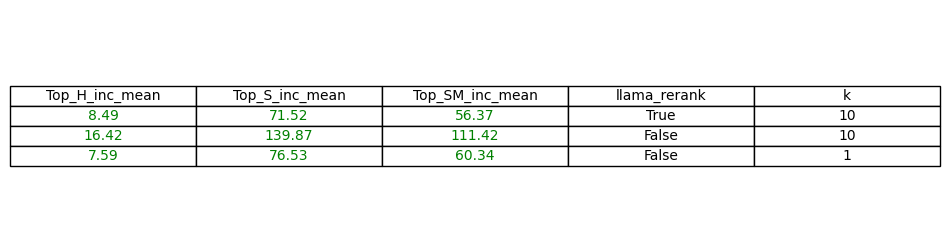

In [32]:
import pandas as pd
import matplotlib.pyplot as plt


fig, ax = plt.subplots(figsize=(10, 3))

ax.axis('off')

tbl = ax.table(
    cellText=final_results.values,
    colLabels=final_results.columns,
    loc='center',
    cellLoc='center',
)

apply_formatting(tbl, final_results)  # Applica il colore e l'arrotondamento qui

tbl.auto_set_font_size(False)
tbl.set_fontsize(10)
tbl.scale(1.2, 1.2)

plt.show()

Metriche quantitative explanations

In [7]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from textstat import flesch_reading_ease

# Funzione per calcolare la lunghezza (numero di parole)
def calculate_length(text):
    return len(nltk.word_tokenize(text))

# Funzione per calcolare la leggibilità (Flesch Reading Ease)
def calculate_readability(text):
    return flesch_reading_ease(text)

# Funzione per calcolare la similarità coseno tra tutte le explanations
def calculate_similarity(explanations):
    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform(explanations)
    similarity_matrix = cosine_similarity(tfidf_matrix)
    
    # Calcoliamo la media delle similarità, esclusa la diagonale (che è 1)
    n = len(explanations)
    return (similarity_matrix.sum() - n) / (n * (n - 1))

# Carica il file JSON
with open('../data/experiment_results_with_llama_and_similarity_k_10.json', 'r') as file:
    experiment_data = json.load(file)

# Liste per raccogliere i valori di lunghezza, leggibilità e similarità
lengths = []
readabilities = []
explanations = []

# Estrai e calcola i valori per ogni ricetta
for recipe in experiment_data:
    explanation = recipe['llama_explanation']
    
    # Calcola lunghezza e leggibilità
    lengths.append(calculate_length(explanation))
    readabilities.append(calculate_readability(explanation))
    
    # Colleziona le explanations per il calcolo della similarità
    explanations.append(explanation)

# Calcola la media dei valori
mean_length = sum(lengths) / len(lengths)
mean_readability = sum(readabilities) / len(readabilities)
mean_similarity = calculate_similarity(explanations)

# Organizza i risultati in un DataFrame 
final_results = pd.DataFrame({
    'Lunghezza': [mean_length],
    'Flesch Reading Ease': [mean_readability],
    'Similarità': [mean_similarity],  
    'k': [10]
})


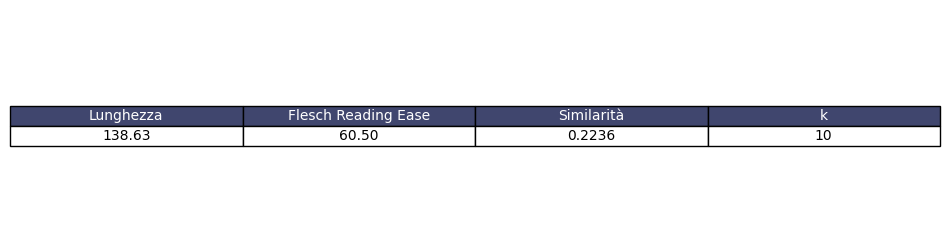

In [8]:
# Funzione per applicare la formattazione personalizzata
def apply_formatting(table, df):

    # Formattazione per ogni colonna: Lunghezza e Leggibilità con 2 cifre, Similarità con 4 e k come intero
    formats = ['{:.2f}', '{:.2f}', '{:.4f}', '{:.0f}']  
    
    for i, fmt in enumerate(formats):  
        for j in range(len(df)):
            table[j+1, i].get_text().set_text(fmt.format(df.iloc[j, i]))
    
    # Colora le celle dell'intestazione
    for i in range(4):
        table[0, i].set_facecolor("#40466e")
        table[0, i].set_text_props(color="w")

# Visualizza la tabella
fig, ax = plt.subplots(figsize=(10, 3))
ax.axis('off')

tbl = ax.table(
    cellText=final_results.values,
    colLabels=final_results.columns,
    loc='center',
    cellLoc='center',
)

apply_formatting(tbl, final_results)  # Applica il colore e la formattazione personalizzata

tbl.auto_set_font_size(False)
tbl.set_fontsize(10)
tbl.scale(1.2, 1.2)

plt.show()

In [6]:
# Print the 3 worst explanations by readability (FRE)
worst_readability_indices = sorted(range(len(readabilities)), key=lambda i: readabilities[i])[:3]
for i in worst_readability_indices:
    print(f"Recipe {i+1} - Readability: {readabilities[i]}")
    print(experiment_data[i]['llama_explanation'])
    print()

# Print best explanation by readability (FRE)
best_readability_index = readabilities.index(max(readabilities))
print(f"Recipe {best_readability_index+1} - Readability: {readabilities[best_readability_index]}")
print(experiment_data[best_readability_index]['llama_explanation'])

Recipe 69 - Readability: 36.79
Let's go with the Cauliflower, Swiss Chard, and Chicken Soup recipe. This delicious and nutritious option stands out as the best choice for a healthy and sustainable meal. Made with chicken, cauliflower, and Swiss chard, this soup is packed with essential vitamins, minerals, and antioxidants. The use of vegetables like cauliflower and Swiss chard reduces the recipe's environmental impact by minimizing the need for resource-intensive meat production. Additionally, this recipe promotes a balanced diet by incorporating a variety of colorful vegetables, which provide essential fiber, vitamins, and minerals. Overall, this Cauliflower, Swiss Chard, and Chicken Soup recipe offers a healthy, sustainable, and flavorful meal option.

Recipe 2 - Readability: 40.89
I'd like to recommend the "Delicious Vegetable Lasagna" recipe. This dish stands out as a healthy and sustainable option because it's a plant-based meal that showcases the flavors of various vegetables, su